In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lime.lime_tabular
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import logistic
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
import pydotplus
from IPython.display import Image 
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [137]:
df_2018 = pd.read_csv('data_prep/indicators_2018_key.csv')
df_2017 = pd.read_csv('data_prep/indicators_pr_2017.csv')
df_2016 = pd.read_csv('data_prep/indicators_pr_2016.csv')
df = pd.concat([df_2018, df_2017, df_2016], ignore_index=True)

### Кодируем зависимую переменную

In [3]:
df.status = df.status.fillna('0')
df['all_pr'] = df.status.apply(lambda x: 1 if x != '0' else 0)
df['det_pr'] = df.status.apply(lambda x: 1 if ('1' in x or '4' in x) else 
                               (2 if ('2' in x or '3' in x or '5' in x) else 0))

In [4]:
df.all_pr.describe()

count    1340.000000
mean        0.061194
std         0.239775
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: all_pr, dtype: float64

In [5]:
df.det_pr.describe()

count    1340.000000
mean        0.091045
std         0.377576
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: det_pr, dtype: float64

In [6]:
df.det_pr[df.det_pr != 0].count()

82

### Разбираемся с нечисловыми столбцами

In [7]:
df.select_dtypes(include='object').head()

,2.1000000000000001,2.1099999999999999,2.1499999999999999,2.1600000000000001,2.2000000000000002,2.2999999999999998,2.3999999999999999,2.5,2.6000000000000001,address,comment,comment_date,name,response,status,t1_3,t1_4,t1_5,t1_6,t1_7,t2_1_E.6,t2_2_E.5,t2_3_E.1,t2_3_E.2,t2_3_E.3,t2_3_E.4,t2_3_E.5,t2_3_E.6,t2_3_E.7,t2_3_E.8,t5_54
0,27.940000000000001,6,5,7.1299999999999999,15.16,584.41999999999996,3.5699999999999998,2.3799999999999999,383.47000000000003,"656031, Алтайский край, г. Барнаул, ул.Молодеж...",NaN,NaN,Федеральное государственное бюджетное образова...,<HtmlResponse 200 http://indicators.miccedu.ru...,0,Черниченко Борис Алексеевич,Министерство образования и науки Российской Фе...,http://uni-altai.ru,Министерство образования и науки РФ,"образовательные организации, не имеющие специф...",70,показатель,0.5,1.3,10.5,2,0.40000000000000002,NaN,NaN,–5.5,да
1,60.18,1,8,4.2300000000000004,86.799999999999997,1123.3900000000001,11.34,15.73,294.42000000000002,"658038, Алтайский край, г.Барнаул, пр.Ленина, 46",NaN,NaN,федеральное государственное бюджетное образова...,<HtmlResponse 200 http://indicators.miccedu.ru...,0,Марков Андрей Михайлович,Министерство образования и науки Российской Фе...,http://www.altstu.ru,Министерство образования и науки Российской Фе...,"образовательные организации, не имеющие специф...",75,показатель,1,–23.9,17.399999999999999,–3.4,12.199999999999999,NaN,NaN,15.6,да
2,189.34,2,39,10.609999999999999,210.22999999999999,2039.1700000000001,45.869999999999997,39.659999999999997,395.32999999999998,"656049, Алтайский край, г.Барнаул, пр. Ленина,61",NaN,NaN,федеральное государственное бюджетное образова...,<HtmlResponse 200 http://indicators.miccedu.ru...,0,Землюков Сергей Валентинович,Министерство образования и науки Российской Фе...,http://www.asu.ru/,Министерство образования и науки Российской Фе...,"образовательные организации, не имеющие специф...",65,показатель,–1.1,6.5999999999999996,17.199999999999999,7.5,–1.0,NaN,NaN,–17.4,да
3,26.760000000000002,0,5,7.7699999999999996,46.909999999999997,156.83000000000001,8.6300000000000008,10.359999999999999,333.81,"675027, Амурская область, г. Благовещенск, Игн...",NaN,NaN,федеральное государственное бюджетное образова...,<HtmlResponse 200 http://indicators.miccedu.ru...,0,Плутенко Андрей Долиевич,Министерство образования и науки Российской Фе...,http://www.amursu.ru,Министерство образования и науки Российской фе...,"образовательные организации, не имеющие специф...",65,показатель,0.5,5.5,1,4.5,5.2000000000000002,NaN,NaN,0.40000000000000002,да
4,8.1899999999999995,0,1,2.23,8.9399999999999995,324.01999999999998,3.7200000000000002,2.98,227.93000000000001,"681000, Хабаровский край, г. Комсомольск-на-Ам...",NaN,NaN,федеральное государственное бюджетное образова...,<HtmlResponse 200 http://indicators.miccedu.ru...,0,Бавыкин Виктор Станиславович,Министерство образования и науки Российской Фе...,http://www.amgpgu.ru,Министерство образования и науки Российской Фе...,"образовательные организации, не имеющие специф...",65,показатель,–1.4,–11.1,–14.8,19.800000000000001,9.4000000000000004,NaN,NaN,–2.8,да


In [8]:
def replace_dash(series, symbol, val):
    new = series.replace(to_replace=symbol, value=val)
    return pd.to_numeric(new)

In [9]:
df['2.1000000000000001'] = replace_dash(df['2.1000000000000001'], '-', None)
df['2.1099999999999999'] = replace_dash(df['2.1099999999999999'], '-', None)
df['2.1499999999999999'] = replace_dash(df['2.1499999999999999'], '-', None)
df['2.1600000000000001'] = replace_dash(df['2.1600000000000001'], '-', None)
df['2.2000000000000002'] = replace_dash(df['2.2000000000000002'],'-', None)
df['2.2999999999999998'] = replace_dash(df['2.2999999999999998'], '-', None)
df['2.3999999999999999'] = replace_dash(df['2.3999999999999999'], '-', None)
df['2.5'] = replace_dash(df['2.5'], '-', None)
df['2.6000000000000001'] = replace_dash(df['2.6000000000000001'], '-', None)

In [10]:
df['t2_1_E.6'] = replace_dash(df['t2_1_E.6'], '—', -1)
df['t2_3_E.1'].fillna('-', inplace=True)
df['t2_3_E.2'].fillna('-', inplace=True)
df['t2_3_E.3'].fillna('-', inplace=True)
df['t2_3_E.4'].fillna('-', inplace=True)
df['t2_3_E.5'].fillna('-', inplace=True)
df['t2_3_E.6'].fillna('-', inplace=True)
df['t2_3_E.7'].fillna('-', inplace=True)
df['t2_3_E.8'].fillna('-', inplace=True)

In [11]:
df['t2_3_E.1'] = df['t2_3_E.1'].apply(lambda x: x.replace('–', '-'))
df['t2_3_E.2'] = df['t2_3_E.2'].apply(lambda x: x.replace('–', '-'))
df['t2_3_E.3'] = df['t2_3_E.3'].apply(lambda x: x.replace('–', '-'))
df['t2_3_E.4'] = df['t2_3_E.4'].apply(lambda x: x.replace('–', '-'))
df['t2_3_E.5'] = df['t2_3_E.5'].apply(lambda x: x.replace('–', '-'))
df['t2_3_E.6'] = df['t2_3_E.6'].apply(lambda x: x.replace('–', '-'))
df['t2_3_E.7'] = df['t2_3_E.7'].apply(lambda x: x.replace('–', '-'))
df['t2_3_E.8'] = df['t2_3_E.8'].apply(lambda x: x.replace('–', '-'))

In [12]:
df['t2_3_E.1'] = replace_dash(df['t2_3_E.1'], '-', -1)
df['t2_3_E.2'] = replace_dash(df['t2_3_E.2'], '-', -1)
df['t2_3_E.3'] = replace_dash(df['t2_3_E.3'], '-', -1)
df['t2_3_E.4'] = replace_dash(df['t2_3_E.4'], '-', -1)
df['t2_3_E.5'] = replace_dash(df['t2_3_E.5'], '-', -1)
df['t2_3_E.6'] = replace_dash(df['t2_3_E.6'], '-', -1)
df['t2_3_E.7'] = replace_dash(df['t2_3_E.7'], '-', -1)
df['t2_3_E.8'] = replace_dash(df['t2_3_E.8'], '-', -1)

In [13]:
df['t5_54'] = df['t5_54'].apply(lambda x: 1 if x == 'да' else 0)

In [14]:
df.select_dtypes(include='object').head()

,address,comment,comment_date,name,response,status,t1_3,t1_4,t1_5,t1_6,t1_7,t2_2_E.5
0,"656031, Алтайский край, г. Барнаул, ул.Молодеж...",NaN,NaN,Федеральное государственное бюджетное образова...,<HtmlResponse 200 http://indicators.miccedu.ru...,0,Черниченко Борис Алексеевич,Министерство образования и науки Российской Фе...,http://uni-altai.ru,Министерство образования и науки РФ,"образовательные организации, не имеющие специф...",показатель
1,"658038, Алтайский край, г.Барнаул, пр.Ленина, 46",NaN,NaN,федеральное государственное бюджетное образова...,<HtmlResponse 200 http://indicators.miccedu.ru...,0,Марков Андрей Михайлович,Министерство образования и науки Российской Фе...,http://www.altstu.ru,Министерство образования и науки Российской Фе...,"образовательные организации, не имеющие специф...",показатель
2,"656049, Алтайский край, г.Барнаул, пр. Ленина,61",NaN,NaN,федеральное государственное бюджетное образова...,<HtmlResponse 200 http://indicators.miccedu.ru...,0,Землюков Сергей Валентинович,Министерство образования и науки Российской Фе...,http://www.asu.ru/,Министерство образования и науки Российской Фе...,"образовательные организации, не имеющие специф...",показатель
3,"675027, Амурская область, г. Благовещенск, Игн...",NaN,NaN,федеральное государственное бюджетное образова...,<HtmlResponse 200 http://indicators.miccedu.ru...,0,Плутенко Андрей Долиевич,Министерство образования и науки Российской Фе...,http://www.amursu.ru,Министерство образования и науки Российской фе...,"образовательные организации, не имеющие специф...",показатель
4,"681000, Хабаровский край, г. Комсомольск-на-Ам...",NaN,NaN,федеральное государственное бюджетное образова...,<HtmlResponse 200 http://indicators.miccedu.ru...,0,Бавыкин Виктор Станиславович,Министерство образования и науки Российской Фе...,http://www.amgpgu.ru,Министерство образования и науки Российской Фе...,"образовательные организации, не имеющие специф...",показатель


### Смотрим на переменные

* t2_1_E.1	Образовательная деятельность, Значение показателя
* t2_1_E.2	Научно-исследовательская деятельность, Значение показателя
* t2_1_E.3	Международная деятельность, Значение показателя
* t2_1_E.4	Финансово-экономическая деятельность, Значение показателя
* t2_1_E.5	Заработная плата ППС, Значение показателя
* t2_1_E.6	Трудоустройство, Значение показателя
* t2_1_E.7	Приведенный контингент, Значение показателя 
* t2_1_E.8	Дополнительный показатель, Значение показателя

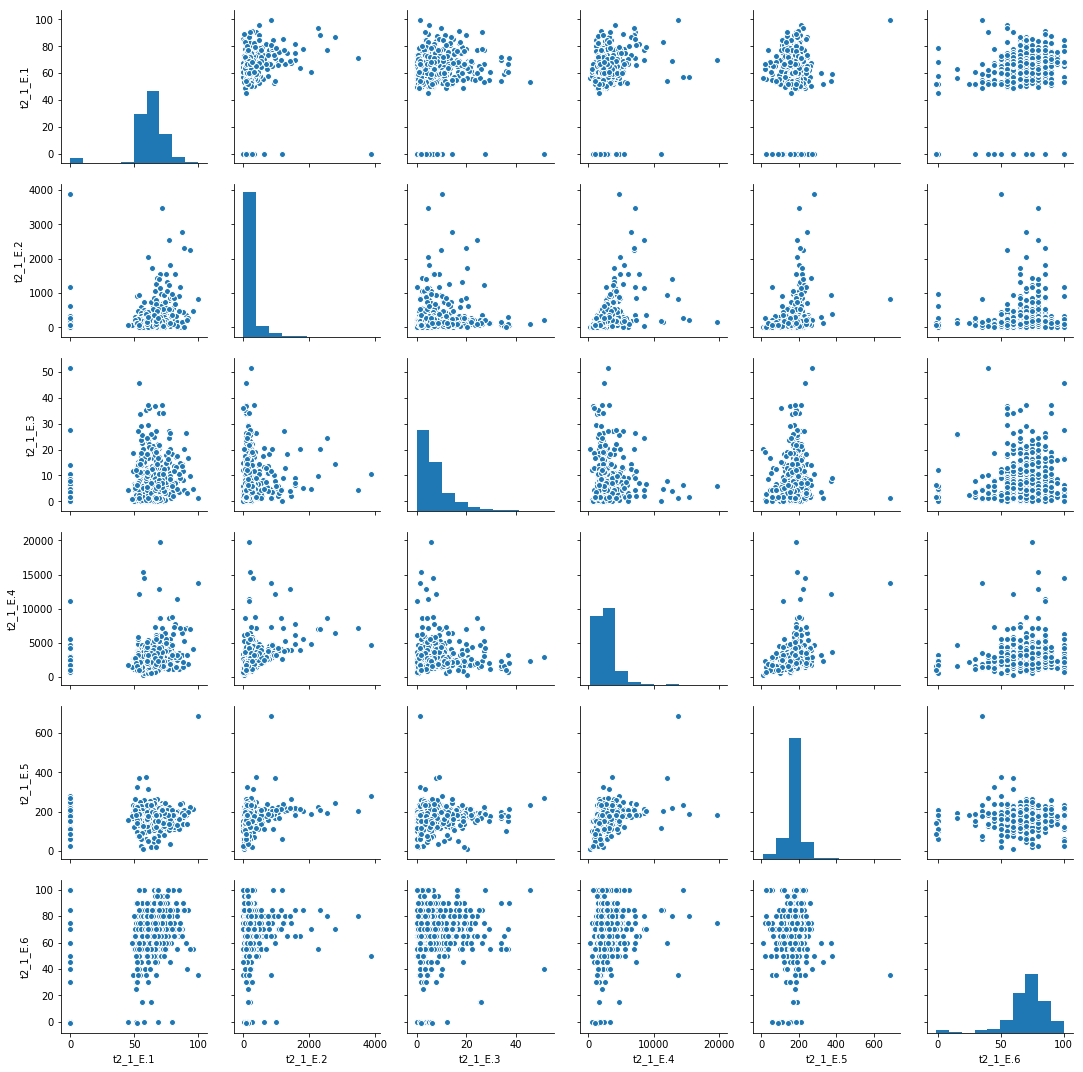

In [15]:
filter_col = [col for col in df if col.startswith('t2_1_')]
sns.pairplot(df[filter_col[:6]].dropna())

In [16]:
df[filter_col].describe()

,t2_1_E.1,t2_1_E.2,t2_1_E.3,t2_1_E.4,t2_1_E.5,t2_1_E.6,t2_1_E.7,t2_1_E.8
count,1324.000000,1324.000000,746.000000,1324.000000,1324.000000,1031.000000,578.000000,1324.000000
mean,53.452885,742.567500,7.309920,3631.672938,570.983369,68.838991,414.309862,14.804411
std,23.219811,20221.851361,7.731167,27112.039402,13198.461636,15.361889,601.814974,35.967532
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,53.285000,62.442500,2.412500,1741.007500,164.480000,60.000000,84.500000,2.947500
50%,60.450000,103.740000,5.205000,2229.735000,186.385000,70.000000,238.000000,3.880000
75%,65.945000,190.825000,9.077500,3068.137500,205.055000,80.000000,463.350000,6.280000
max,99.310000,735892.540000,79.790000,981925.000000,479176.420000,100.000000,5108.800000,778.740000


Посотрим на процентное отклонение от пороговых значений

In [17]:
df['t2_E.1_diff'] = (df['t2_1_E.1'] - df['t2_2_E.1']) / df['t2_2_E.1']
df['t2_E.2_diff'] = (df['t2_1_E.2'] - df['t2_2_E.2']) / df['t2_2_E.2']
df['t2_E.3_diff'] = (df['t2_1_E.3'] - df['t2_2_E.3']) / df['t2_2_E.3']
df['t2_E.4_diff'] = (df['t2_1_E.4'] - df['t2_2_E.4']) / df['t2_2_E.4']
# unconsistent
# df['t2_E.5_diff'] = (df['t2_1_E.5'] - df['t2_2_E.5']) / df['t2_2_E.5']
df['t2_E.6_diff'] = (df['t2_1_E.6'] - df['t2_2_E.6']) / df['t2_2_E.6']
df['t2_E.7_diff'] = (df['t2_1_E.7'] - df['t2_2_E.7']) / df['t2_2_E.7']
df['t2_E.8_diff'] = (df['t2_1_E.8'] - df['t2_2_E.8']) / df['t2_2_E.8']

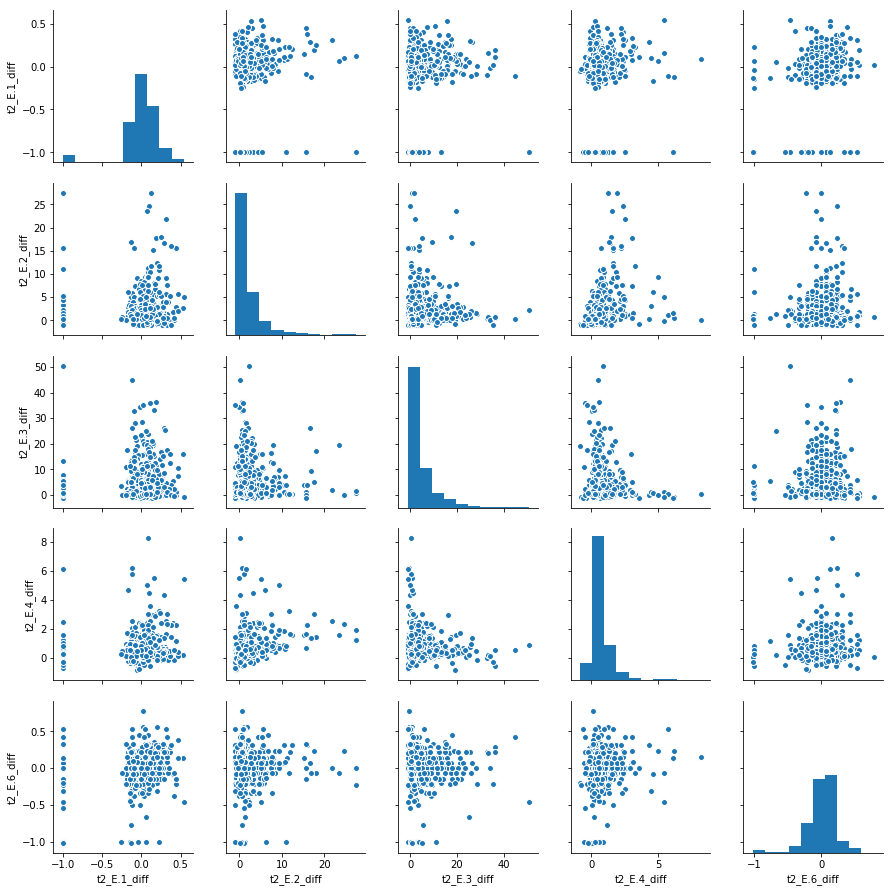

In [18]:
filter_col = [col for col in df if col.startswith('t2_E.')]
sns.pairplot(df[filter_col[:5]].dropna())

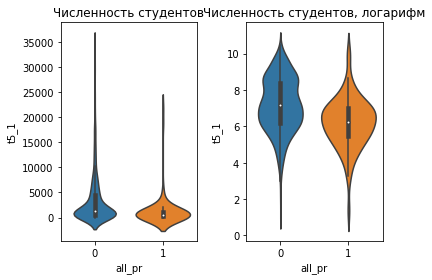

In [19]:
plt.subplot(1, 2, 1)
ax = sns.violinplot(y=df['t5_1'], x=df['all_pr'])
ax.set_title('Численность студентов')

plt.subplot(1, 2, 2)
ax = sns.violinplot(y=np.log(df['t5_1']), x=df['all_pr'])
ax.set_title('Численность студентов, логарифм')

plt.tight_layout()

* t5_1	Общая численность студентов, обучающихся по программам бакалавриата, специалитета, магистратуры, чел.
* t5_14	Общий объем средств, поступивших (за отчетный год) от выполнения НИОКР, выполненных собственными силами, тыс. руб.
* t5_16	Общее количество публикаций организации в расчете на 100 НПР, ед.
* t5_26	Общая численность работников образовательной организации (без внешних совместителей и работающих по договорам ГПХ), чел.
* t5_29	Доля ППС, имеющих ученые степени, %
* t5_33	Средняя заработная плата ППС (без внешних совместителей и работающих по договорам ГПХ), тыс. руб.
* t5_46	Общая площадь зданий (помещений), м
* t5_5	Средний балл ЕГЭ студентов, принятых на обучение по программам бакалавриата и специалитета, по всем формам обучения, балл
* t5_56	Доходы филиала  из всех источников, тыс. руб.

In [20]:
df[['t5_1', 't5_14', 't5_16', 't5_26', 't5_29', 't5_33', 't5_46', 
    't5_5', 't5_56', 'all_pr']].groupby('all_pr').describe().T

all_pr                  0             1
t5_1  count  1.244000e+03  8.000000e+01
      mean   3.361543e+03  1.308825e+03
      std    4.862789e+03  3.224843e+03
      min    3.000000e+00  4.000000e+00
      25%    4.797500e+02  2.365000e+02
      50%    1.282500e+03  5.100000e+02
      75%    4.423000e+03  1.097000e+03
      max    3.461300e+04  2.190700e+04
t5_14 count  1.244000e+03  8.000000e+01
      mean   7.176279e+04  6.654399e+03
      std    3.186628e+05  1.400122e+04
      min    0.000000e+00  0.000000e+00
      25%    1.319150e+03  9.231000e+02
      50%    5.102100e+03  2.320250e+03
      75%    3.042872e+04  6.255650e+03
      max    6.069631e+06  9.351370e+04
t5_16 count  1.244000e+03  8.000000e+01
      mean   4.667357e+02  3.585761e+02
      std    5.729178e+03  6.391694e+02
      min    0.000000e+00  0.000000e+00
      25%    0.000000e+00  8.376500e+01
      50%    2.118300e+02  1.787450e+02
      75%    4.199475e+02  4.816350e+02
      max    2.015000e+05  5.220590e+03
t5_26 count  1.244000e+03  8.000000e+01
      mean   5.020924e+02  1.083500e+02
      std    1.004833e+03  2.440116e+02
      min    0.000000e+00  5.000000e+00
      25%    4.600000e+01  3.000000e+01
      50%    1.230000e+02  5.000000e+01
      75%    5.975000e+02  9.600000e+01
      max    1.925400e+04  2.005000e+03
t5_29 count  1.244000e+03  8.000000e+01
      mean   7.399542e+01  7.648125e+01
      std    1.757856e+01  1.874352e+01
      min    0.000000e+00  0.000000e+00
      25%    6.752500e+01  6.667000e+01
      50%    7.651000e+01  8.000000e+01
      75%    8.462000e+01  8.832250e+01
      max    1.000000e+02  1.000000e+02
t5_33 count  1.244000e+03  8.000000e+01
      mean   8.430944e+01  1.936002e+03
      std    8.144524e+02  1.679693e+04
      min    0.000000e+00  5.020000e+00
      25%    4.303750e+01  3.821250e+01
      50%    5.241000e+01  5.383000e+01
      75%    6.849500e+01  7.824000e+01
      max    2.875751e+04  1.502942e+05
t5_46 count  1.244000e+03  8.000000e+01
      mean   4.984179e+04  1.030708e+04
      std    9.217415e+04  2.661893e+04
      min    0.000000e+00  6.530000e+02
      25%    4.563500e+03  2.015250e+03
      50%    1.341000e+04  3.863000e+03
      75%    6.335050e+04  6.867500e+03
      max    1.373820e+06  1.745500e+05
t5_5  count  1.244000e+03  8.000000e+01
      mean   5.568357e+01  4.653375e+01
      std    1.800856e+01  2.341214e+01
      min    0.000000e+00  0.000000e+00
      25%    5.384750e+01  5.008250e+01
      50%    5.892000e+01  5.387000e+01
      75%    6.384250e+01  6.034000e+01
      max    9.931000e+01  7.400000e+01
t5_56 count  1.244000e+03  8.000000e+01
      mean   6.352883e+05  1.148356e+05
      std    1.573875e+06  2.371450e+05
      min    1.000000e+00  2.000000e+03
      25%    4.677495e+04  2.272850e+04
      50%    1.409515e+05  4.946520e+04
      75%    5.875378e+05  8.772267e+04
      max    2.541882e+07  1.745575e+06

## Модели
### Бинарная зависимая перменная
#### RF

In [37]:
df.fillna(0, inplace=True)
# убираем текстовые переменные
X = df.drop(['address', 'comment', 'comment_date', 'name', 'response', 'status',
       't1_3', 't1_4', 't1_5', 't1_6', 't1_7', 'all_pr', 'det_pr'], axis=1)
# убираем бенчмарки
drop_col = [col for col in df if col.startswith('t2_2_')]
X = X.drop(drop_col, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, df['all_pr'], 
                                                    test_size=0.25, random_state=35, shuffle=True)

In [38]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Text(0.5,0,'False Positive Rate')

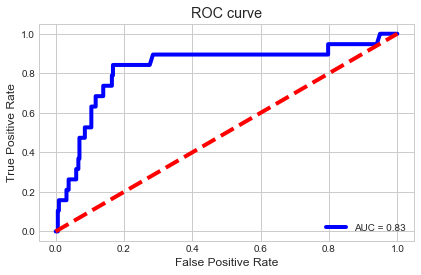

In [39]:
prob = clf.predict_proba(X_test)
preds = prob[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [40]:
np.set_printoptions(threshold=np.nan)
np.append(prob, y_test.values.reshape(335,1), axis=1)

array([[0.9382962 , 0.0617038 , 0.        ],
       [0.86095111, 0.13904889, 0.        ],
       [0.90219143, 0.09780857, 0.        ],
       [0.96765181, 0.03234819, 0.        ],
       [0.9011448 , 0.0988552 , 0.        ],
       [0.92263632, 0.07736368, 0.        ],
       [0.97649609, 0.02350391, 0.        ],
       [0.9789262 , 0.0210738 , 0.        ],
       [0.98288124, 0.01711876, 0.        ],
       [0.97965373, 0.02034627, 0.        ],
       [0.96299682, 0.03700318, 0.        ],
       [0.9689093 , 0.0310907 , 0.        ],
       [0.97915566, 0.02084434, 0.        ],
       [0.98277748, 0.01722252, 0.        ],
       [0.96805029, 0.03194971, 0.        ],
       [0.96681777, 0.03318223, 0.        ],
       [0.96217408, 0.03782592, 0.        ],
       [0.96709978, 0.03290022, 0.        ],
       [0.58954166, 0.41045834, 0.        ],
       [0.87620985, 0.12379015, 1.        ],
       [0.88973938, 0.11026062, 0.        ],
       [0.9196348 , 0.0803652 , 0.        ],
       [0.

/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


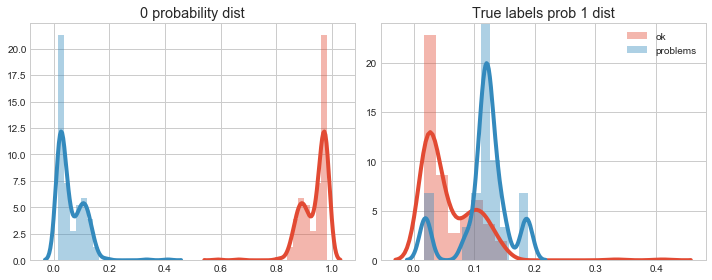

In [41]:
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(1, 2, 1)
ax = sns.distplot(prob[:, 0], label='0')
ax = sns.distplot(prob[:, 1], label='1')
ax.set_title('0 probability dist')

new_prob = np.append(prob, y_test.values.reshape(335,1), axis=1)
plt.subplot(1, 2, 2)
ax = sns.distplot(new_prob[new_prob[:, 2] == 0][:, 1], label='ok')
ax = sns.distplot(new_prob[new_prob[:, 2] == 1][:, 1], label = 'problems')
ax.legend()
ax.set_title('True labels prob 1 dist')

plt.tight_layout()

1. t2_3_E.6,"Трудоустройство, Изменение относительно прошлого года"
2. 4.2000000000000002,"Доля доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения (деятельности) образовательной организации, %"
3. t5_59,"Доля доходов филиала  из федерального бюджета, %"
4. t2_E.6_diff Трудоустройство, отклонение от порога
5. t5_47,"Площадь учебно-лабораторных зданий, м"
6. t4_1_4 % обучающихся по договорам платных услуг
7. t5_58,"Доля доходов филиала  из внебюджетных источников, %"
8. 5.2999999999999998,"Общая площадь учебно-лабораторных помещений в расчете на одного студента (приведенного контингента), закрепленных на праве оперативного управления, м"
9. t4_1_3 за счет бюджетных ассигнований
10. t4_1_2 студентов очной формы обучения
11. t2_E.3_diff отклонение по международной деятельности

In [42]:
importances = list(zip(clf.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

[(0.07032500539152607, 't2_3_E.6'),
 (0.05144327683644324, 't4_4_080000_2'),
 (0.047830631140981066, '4.2000000000000002'),
 (0.047583680870133024, 't4_4_030000_2'),
 (0.043815953535548485, 't5_59'),
 (0.04132947508150984, 't4_4_030000_1'),
 (0.037166777238174416, 't2_E.6_diff'),
 (0.035108320241908, 't4_1_4'),
 (0.030839232009999763, 't4_4_080000_1'),
 (0.024420740529324688, 't5_47'),
 (0.024047362156540762, 't5_58'),
 (0.0225638311457779, '5.2999999999999998'),
 (0.0200290357015226, 't4_1_3'),
 (0.01990223377683564, 't4_1_2'),
 (0.01859677482777861, 't4_4_030000_3'),
 (0.018405117445491205, '5.2000000000000002'),
 (0.018316066841587805, '5.5'),
 (0.017704279379906308, 't2_E.3_diff'),
 (0.01737692158886986, '1.7'),
 (0.015852139285264896, '2.2999999999999998'),
 (0.015780807672651786, 't5_52'),
 (0.014553550848107149, '1.2'),
 (0.013427687629256177, '1.1000000000000001'),
 (0.0119315047465424, 't5_63'),
 (0.011311286318768963, 't5_46'),
 (0.010690303862175465, 't4_1_1'),
 (0.010584747

/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/cbook

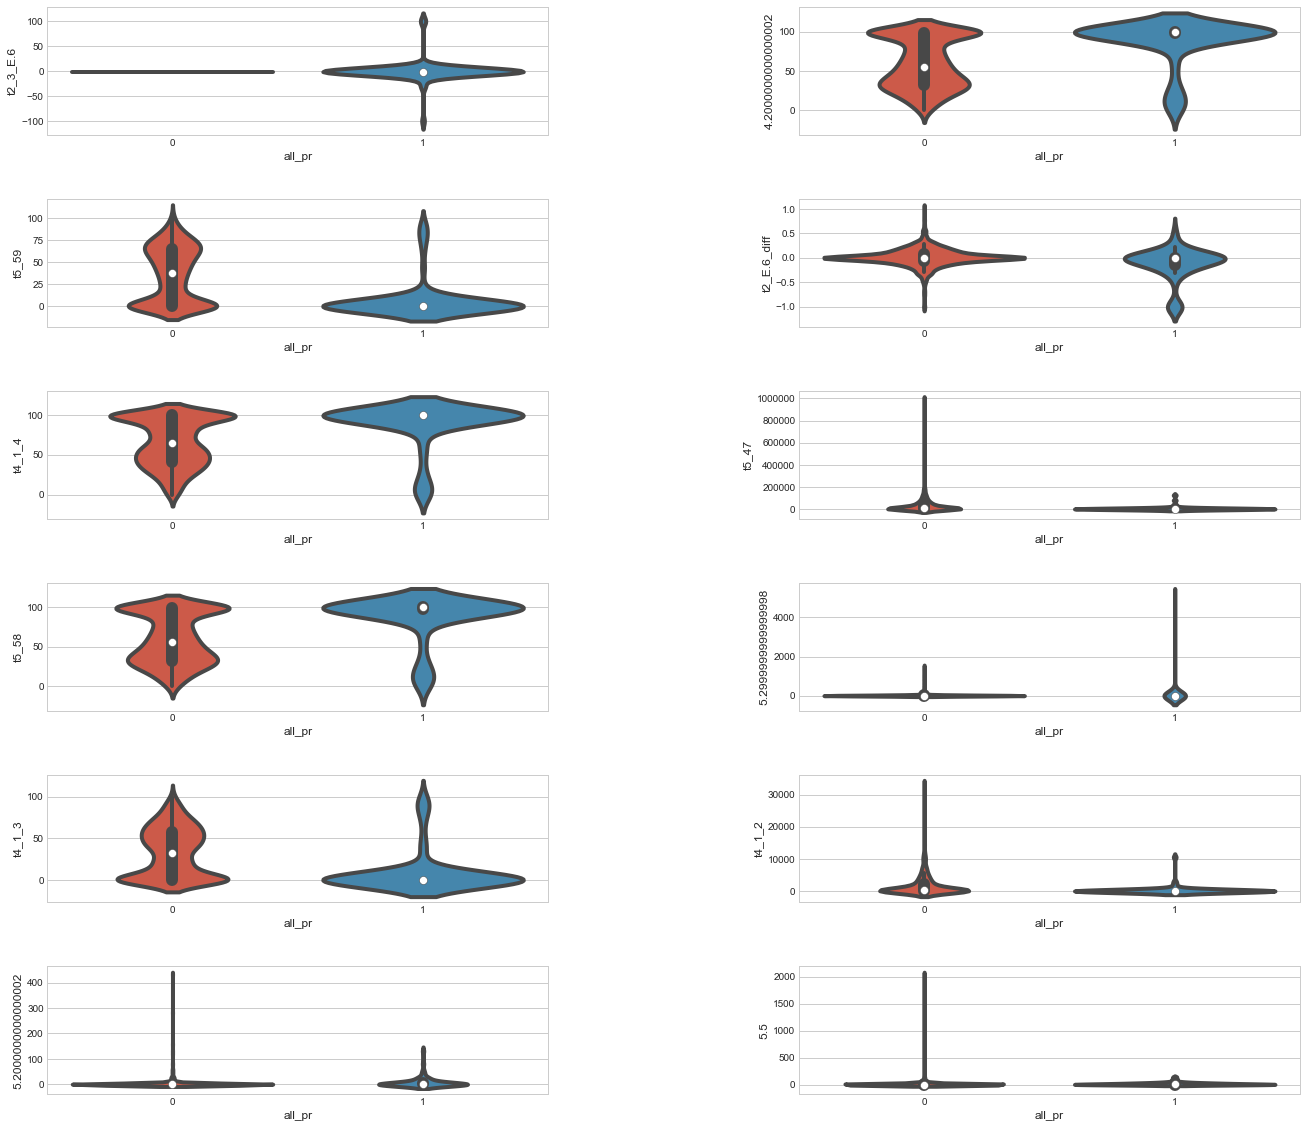

In [43]:
plot_cols = ['t2_3_E.6', '4.2000000000000002', 't5_59', 't2_E.6_diff', 't4_1_4', 't5_47', 't5_58',
            '5.2999999999999998', 't4_1_3', 't4_1_2', '5.2000000000000002', '5.5']

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range (1, 13):
    plt.subplot(6, 2, i)
    ax = fig.add_subplot(6, 2, i)
    ax = sns.violinplot(x=df['all_pr'], y=df[plot_cols[i-1]])

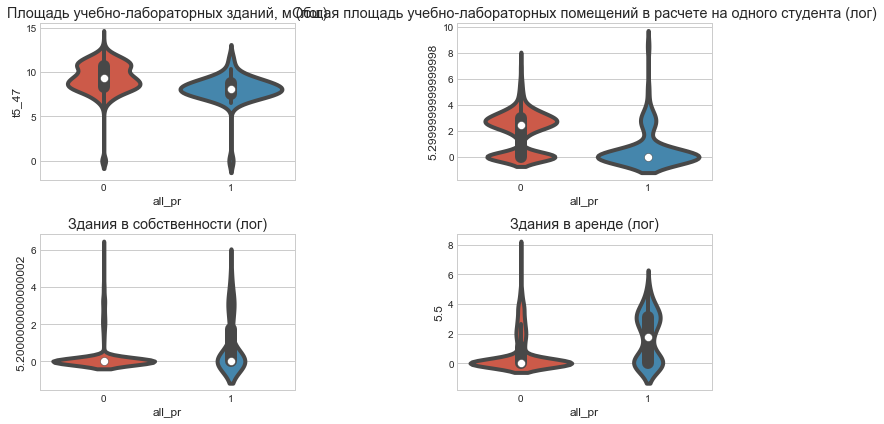

In [44]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(2, 2, 1)
ax = sns.violinplot(x=df['all_pr'], y=np.log(df['t5_47'] + 1))
ax.set_title('Площадь учебно-лабораторных зданий, м (лог)')

plt.subplot(2, 2, 2)
ax = sns.violinplot(x=df['all_pr'], y=np.log(df['5.2999999999999998'] + 1))
ax.set_title('Общая площадь учебно-лабораторных помещений в расчете на одного студента (лог)')

plt.subplot(2, 2, 3)
ax = sns.violinplot(x=df['all_pr'], y=np.log(df['5.2000000000000002'] + 1))
ax.set_title('Здания в собственности (лог)')

plt.subplot(2, 2, 4)
ax = sns.violinplot(x=df['all_pr'], y=np.log(df['5.5'] + 1))
ax.set_title('Здания в аренде (лог)')

plt.tight_layout()

#### Логит на фичах из RF

In [45]:
logit_model = sm.Logit(y_train, X_train[['4.2000000000000002', 't5_59', 't2_E.6_diff', 't4_1_4', 't5_47', 't5_58',
            '5.2999999999999998', 't4_1_2', '5.2000000000000002']])
result = logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.189105
         Iterations 11


/Users/ola/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/ola/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/ola/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/ola/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                Results: Logit
==============================================================================================================
Model:                             Logit                           Pseudo R-squared:                0.193     
Dependent Variable:                all_pr                          AIC:                             396.1012  
Date:                              2019-04-01 21:14                BIC:                             435.4031  
No. Observations:                  1005                            Log-Likelihood:                  -190.05   
Df Model:                          7                               LL-Null:                         -235.47   
Df Residuals:                      997                             LLR p-value:                     8.3358e-17
Converged:                         1.0000                          Scale:                           1.0000    
No. Iterations:                    11.0000                                                                    
--------------------------------------------------------------------------------------------------------------
                    Coef.        Std.Err.             z        P>|z|         [0.025               0.975]      
--------------------------------------------------------------------------------------------------------------
4.2000000000000002  0.0020 20740934730307.9141          0.0000 1.0000 -40651485077099.4922 40651485077099.4922
t5_59              -0.0484              0.0000 -137934748.3191 0.0000              -0.0484             -0.0484
t2_E.6_diff        -2.4024              0.5321         -4.5151 0.0000              -3.4453             -1.3596
t4_1_4             -0.0230                 nan             nan    nan                  nan                 nan
t5_47               0.0000              0.0000          0.0797 0.9365              -0.0001              0.0001
t5_58               0.0020 20740934730307.9570          0.0000 1.0000 -40651485077099.5781 40651485077099.5781
5.2999999999999998  0.0008              0.0006          1.2953 0.1952              -0.0004              0.0020
t4_1_2             -0.0012              0.0006         -1.9661 0.0493              -0.0024             -0.0000
5.2000000000000002  0.0075              0.0058          1.2975 0.1945              -0.0038              0.0189
==============================================================================================================

"""

Text(0.5,0,'False Positive Rate')

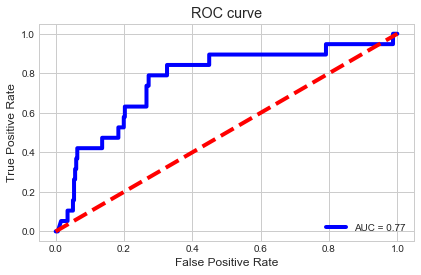

In [49]:
prob = result.predict(X_test[['4.2000000000000002', 't5_59', 't2_E.6_diff', 't4_1_4', 't5_47', 't5_58',
            '5.2999999999999998', 't4_1_2', '5.2000000000000002']])
fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Логит на подобранных фичах

In [172]:
logit_model_2 = sm.Logit(y_train, X_train[[ 't5_59', 't2_E.6_diff', '1.2', 't2_1_E.7', '4.0999999999999996', 
                                           '7.2999999999999998', 't4_1_4', 't4_1_2']])
result = logit_model_2.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.179352
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.235     
Dependent Variable:  all_pr           AIC:              376.4983  
Date:                2019-04-01 22:27 BIC:              415.8002  
No. Observations:    1005             Log-Likelihood:   -180.25   
Df Model:            7                LL-Null:          -235.47   
Df Residuals:        997              LLR p-value:      7.4492e-21
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      10.0000                                      
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
t5_59              -0.0312   0.0090 -3.4789 0.0005 -0.0488 -0.0136
t2_E.6_diff        -2.1489   0.5521 -3.8920 0.0001 -3.2311 -1.0668
1.2                -0.0173   0.0079 -2.1928 0.0283 -0.0327 -0.0018
t2_1_E.7           -0.0043   0.0016 -2.7380 0.0062 -0.0075 -0.0012
4.0999999999999996 -0.0002   0.0001 -1.3992 0.1618 -0.0004  0.0001
7.2999999999999998  0.0037   0.0070  0.5251 0.5995 -0.0100  0.0173
t4_1_4             -0.0145   0.0061 -2.3769 0.0175 -0.0264 -0.0025
t4_1_2             -0.0007   0.0004 -1.8651 0.0622 -0.0014  0.0000
==================================================================

"""

In [173]:
pred_logit =  result.predict(X_test[['t5_59', 't2_E.6_diff', '1.2', 't2_1_E.7', 
                                     '4.0999999999999996', '7.2999999999999998', 
                                     't4_1_4', 't4_1_2']])

/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'True labels prob dist')

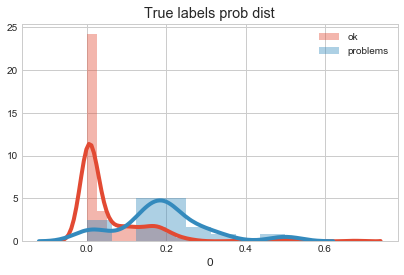

In [174]:
new_pred_logit = pd.concat([pred_logit, y_test], axis=1)

ax = sns.distplot(new_pred_logit[new_pred_logit['all_pr'] == 0][0], label='ok')
ax = sns.distplot(new_pred_logit[new_pred_logit['all_pr'] == 1][0], label = 'problems')
ax.legend()
ax.set_title('True labels prob dist')

Text(0.5,0,'False Positive Rate')

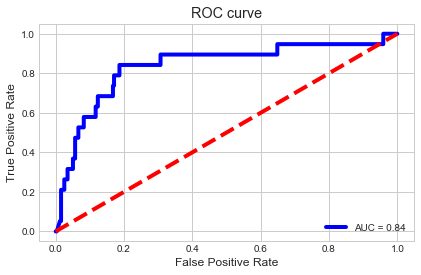

In [175]:
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_logit)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [176]:
new_pred_logit

,0,all_pr
686,4.110026e-02,0
543,2.143873e-01,0
539,9.374259e-02,0
832,2.511949e-03,0
589,1.333683e-01,0
531,8.475958e-02,0
202,2.497498e-03,0
369,2.246810e-03,0
164,8.405793e-05,0
401,8.244242e-04,0


In [186]:
final_pred_logit = (pred_logit > 0.15).astype(int)
print(classification_report(y_test, final_pred_logit))

             precision    recall  f1-score   support

          0       0.98      0.85      0.91       316
          1       0.22      0.68      0.33        19

avg / total       0.94      0.84      0.88       335



In [33]:
df.loc[543]['name'] # не выполнено три показателя

'Автономная некоммерческая организация высшего образования "Институт экономики и управления"'

In [34]:
df.loc[491]['name'] # проверить статус! нет в мониторинге 2018

'Негосударственное частное образовательное учреждение высшего образования "Северный институт предпринимательства"'

In [35]:
df.loc[885]['name']

'Филиал федерального государственного бюджетного образовательного учреждения высшего образования "Удмуртский государственный университет" в городе Нижняя Тура'

In [36]:
df.loc[936]['name']

'Филиал образовательного учреждения профессионального образования "Санкт-Петербургский институт внешнеэкономических связей, экономики и права" в г.Краснодаре '

In [37]:
df.loc[861]['name']

'Филиал федерального государственного бюджетного образовательного учреждения высшего образования "Ростовский государственный экономический университет (РИНХ)" в г.Махачкале Республики Дагестан'

#### KNN

In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'True labels prob 1 dist')

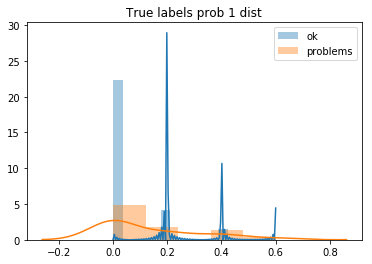

In [40]:
knn_prob = knn.predict_proba(X_test)
new_knn_prob = np.append(knn_prob, y_test.values.reshape(335,1), axis=1)

ax = sns.distplot(new_knn_prob[new_knn_prob[:, 2] == 0][:, 1], label='ok')
ax = sns.distplot(new_knn_prob[new_knn_prob[:, 2] == 1][:, 1], label = 'problems')
ax.legend()
ax.set_title('True labels prob 1 dist')

#### LASSO

In [106]:
ls = LassoCV(cv=5)
sfm = SelectFromModel(clf, threshold=0.03)
sfm.fit(X_train, y_train)
n_features = sfm.transform(X_train).shape[1]
while n_features > 10:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X_train)
    n_features = X_transform.shape[1]

9


In [112]:
feature_names = np.array(X_train.columns)
feature_names[sfm.get_support()]

array(['4.2000000000000002', 't2_3_E.6', 't4_1_4', 't4_4_030000_1',
       't4_4_030000_2', 't4_4_080000_1', 't4_4_080000_2', 't5_59',
       't2_E.6_diff'], dtype=object)

* 4.2000000000000002,"Доля доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения (деятельности) образовательной организации, %"
* t2_3_E.6,"Трудоустройство, Изменение относительно прошлого года"
* t4_1_4 число платников
* t4_4_030000_1 доля студентов гуманитарного специалитета
* t4_4_080000_1 доля студентов экономического специалитета
* t5_59,"Доля доходов филиала  из федерального бюджета, %"
* t2_E.6_diff отклонение от показателя по трудовой деятельности

#### SVM

In [127]:
svm = SVC(probability=True, )
svm.fit(X_train, y_train)
preds = svm.predict_proba(X_test)

Text(0.5,0,'False Positive Rate')

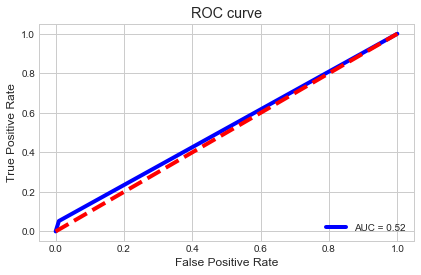

In [128]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [129]:
svm = SVC(probability=True)
svm.fit(X_train[[ 't5_59', 't2_E.6_diff', '1.2', 't2_1_E.7', '4.0999999999999996', 
                                           '7.2999999999999998', 't4_1_4', 't4_1_2']], y_train)
preds = svm.predict_proba(X_test[[ 't5_59', 't2_E.6_diff', '1.2', 't2_1_E.7', '4.0999999999999996', 
                                           '7.2999999999999998', 't4_1_4', 't4_1_2']])

Text(0.5,0,'False Positive Rate')

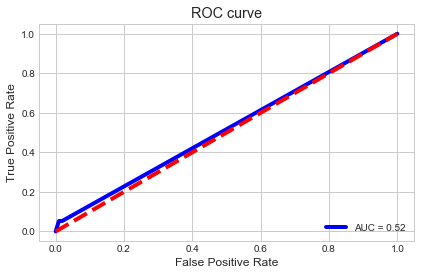

In [130]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### DecisionTree

In [134]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [150]:
#dot_data = StringIO()
#export_graphviz(tree, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [146]:
importances = list(zip(tree.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

[(0.1806403855168361, 't2_3_E.6'),
 (0.12434283305288488, 't4_4_080000_2'),
 (0.05669041555511224, 't5_52'),
 (0.04172814759109907, 't5_59'),
 (0.038593364837807474, 't5_16'),
 (0.030836920619392007, 't4_4_15.00.00_3'),
 (0.0282150003785255, 't4_4_45.00.00_2'),
 (0.027666278512094054, '7.4000000000000004'),
 (0.02675806628754652, 't5_33'),
 (0.025802421062991288, 't5_26'),
 (0.025802421062991288, 't4_4_40.00.00_3'),
 (0.02330638266179285, '7.5'),
 (0.020017737715943257, 't2_3_E.1'),
 (0.019777964380410476, 't2_3_E.2'),
 (0.018625729584214806, '2.1000000000000001'),
 (0.0185269748143025, '2.1600000000000001'),
 (0.017102754191178147, '2.5'),
 (0.01690838245618062, '5.2000000000000002'),
 (0.015670704635682105, 't4_4_37.00.00_3'),
 (0.01555714880498858, 't4_4_54.00.00_1'),
 (0.015444822820837426, '3.1000000000000001.1'),
 (0.015333708987593899, 't4_4_51.00.00_2'),
 (0.01522378992675074, '5.0999999999999996'),
 (0.01511504857013128, 't2_E.2_diff'),
 (0.014334678368328494, 't4_2_6'),
 (0.0

Text(0.5,0,'False Positive Rate')

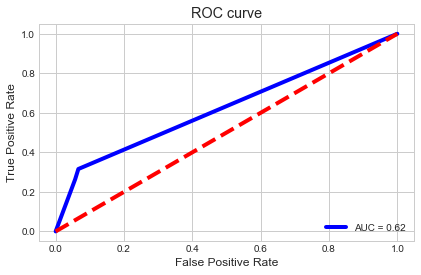

In [149]:
pred = tree.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### XGBoost

In [153]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

Text(0.5,0,'False Positive Rate')

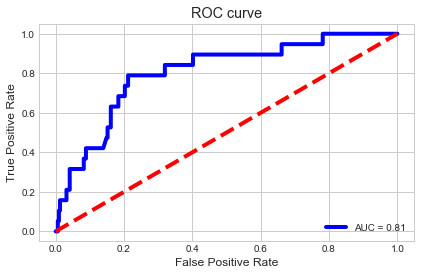

In [154]:
pred = gb.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, pred[:, 1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'True labels prob 1 dist')

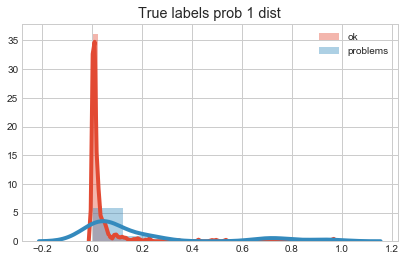

In [158]:
new_gb_prob = np.append(pred, y_test.values.reshape(335,1), axis=1)

ax = sns.distplot(new_gb_prob[new_gb_prob[:, 2] == 0][:, 1], label='ok')
ax = sns.distplot(new_gb_prob[new_gb_prob[:, 2] == 1][:, 1], label = 'problems')
ax.legend()
ax.set_title('True labels prob 1 dist')

In [156]:
importances = list(zip(gb.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

[(0.09530090025299179, 't2_3_E.6'),
 (0.06584704915500225, 't4_4_080000_2'),
 (0.03868807451109137, 't2_3_E.8'),
 (0.03313078790654266, 't4_4_31.00.00_2'),
 (0.025325508275225523, 't4_4_51.00.00_2'),
 (0.024245358705565517, '5.0999999999999996'),
 (0.021940646957537027, 't5_59'),
 (0.02124156904284317, '2.2000000000000002'),
 (0.021179239031564184, '4.0999999999999996'),
 (0.020034162887434294, 't4_4_47.00.00_2'),
 (0.01913039651698749, '5.2000000000000002'),
 (0.0183394822935148, 't5_19'),
 (0.016603567532885027, 't2_1_E.8'),
 (0.01607662387662069, 't5_52'),
 (0.015982684873760786, 't4_3_4'),
 (0.01577911439243657, 't5_50'),
 (0.015382163037392477, '5.5'),
 (0.014675534091965725, 't5_6'),
 (0.014581926005565732, '7.4000000000000004'),
 (0.01455013317699892, 't5_46'),
 (0.012945146233833051, 't4_4_37.00.00_3'),
 (0.01254825222761649, '5.7999999999999998'),
 (0.012535434362881445, 't2_3_E.2'),
 (0.012329599758392165, 't5_5'),
 (0.012015260020132675, '2.6000000000000001'),
 (0.0119154691

In [168]:
gb_pred = (pred[:, 1] > 0.03).astype(int)

In [171]:
print(classification_report(y_test, gb_pred))

             precision    recall  f1-score   support

          0       0.98      0.78      0.87       316
          1       0.18      0.79      0.29        19

avg / total       0.94      0.78      0.84       335



### Порядковая зависимая переменная

#### RF

In [113]:
# убираем текстовые переменные
X_ord = df.drop(['address', 'comment', 'comment_date', 'name', 'response', 'status',
       't1_3', 't1_4', 't1_5', 't1_6', 't1_7', 'all_pr', 'det_pr'], axis=1)
# убираем бенчмарки
drop_col = [col for col in df if col.startswith('t2_2_')]
X_ord = X_ord.drop(drop_col, axis = 1)
X_train_ord, X_test_ord, y_train_ord, y_test_ord = train_test_split(X_ord, df['det_pr'],
                                                                    test_size=0.25, random_state=35, shuffle=True)

In [42]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X_train_ord, y_train_ord)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
prob = clf.predict_proba(X_test_ord)
np.set_printoptions(threshold=np.nan)
np.append(prob, y_test_ord.values.reshape(335,1), axis=1)

array([[0.94338418, 0.03064618, 0.02596965, 0.        ],
       [0.86892935, 0.06875768, 0.06231298, 0.        ],
       [0.90921061, 0.04928108, 0.04150831, 0.        ],
       [0.96598514, 0.01770898, 0.01630589, 0.        ],
       [0.90507726, 0.0506242 , 0.04429854, 0.        ],
       [0.9265434 , 0.04040912, 0.03304748, 0.        ],
       [0.97407502, 0.01389125, 0.01203373, 0.        ],
       [0.9779686 , 0.01174781, 0.01028358, 0.        ],
       [0.97978246, 0.01077588, 0.00944166, 0.        ],
       [0.97869614, 0.01146809, 0.00983577, 0.        ],
       [0.96331425, 0.01882103, 0.01786473, 0.        ],
       [0.96844698, 0.01708375, 0.01446927, 0.        ],
       [0.97673459, 0.01276444, 0.01050098, 0.        ],
       [0.97887432, 0.01105796, 0.01006772, 0.        ],
       [0.96665218, 0.01572057, 0.01762726, 0.        ],
       [0.9644146 , 0.01913401, 0.0164514 , 0.        ],
       [0.96026317, 0.02109456, 0.01864227, 0.        ],
       [0.96999581, 0.01599212,

/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Probability distributions')

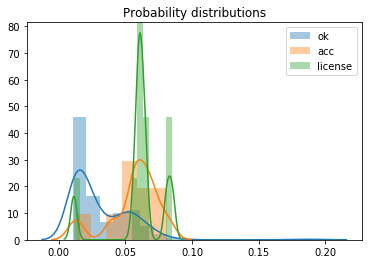

In [44]:
new_prob = np.append(prob, y_test_ord.values.reshape(335,1), axis=1)
ax = sns.distplot(new_prob[new_prob[:, 3] == 0][:, 1], label='ok')
ax = sns.distplot(new_prob[new_prob[:, 3] == 1][:, 1], label = 'acc')
ax = sns.distplot(new_prob[new_prob[:, 3] == 2][:, 1], label = 'license')
ax.legend()
ax.set_title('Probability distributions')

In [45]:
importances = list(zip(clf.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

[(0.0636518158433281, 't2_3_E.6'),
 (0.05736535988570335, 't4_4_080000_2'),
 (0.04521685526955528, '4.2000000000000002'),
 (0.04470064398103599, 't4_4_030000_2'),
 (0.04235883035920101, 't4_4_030000_1'),
 (0.03894969157922585, 't2_E.6_diff'),
 (0.03132340544733963, 't4_1_4'),
 (0.028759364027706374, 't4_1_3'),
 (0.028610891575107707, 't5_59'),
 (0.024792852057967725, 't4_4_080000_1'),
 (0.02392143683319712, '5.2999999999999998'),
 (0.022866457908158222, '2.2999999999999998'),
 (0.022094070313402932, 't5_58'),
 (0.01931088620939035, 't5_47'),
 (0.018853262899848372, 't5_52'),
 (0.01847079184704533, 't4_4_030000_3'),
 (0.018334474474761005, '5.5'),
 (0.01677966768546878, '1.7'),
 (0.015547383951595306, 't4_1_2'),
 (0.013827080900013873, 't5_63'),
 (0.013688486049555151, 't4_4_45.00.00_2'),
 (0.013634786521360966, '5.2000000000000002'),
 (0.01357760735254758, 't4_4_050000_2'),
 (0.011892167803196177, 't2_1_E.6'),
 (0.011865043407834997, '1.1000000000000001'),
 (0.010963015291313214, 't2_E

* t2_3_E.6,"Трудоустройство, Изменение относительно прошлого года"
* t4_4_080000_2, Экономика и управление, Доля приведенного контингента студентов по   от общего приведенного контингента студентов организации
* 4.2000000000000002,"Доля доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения (деятельности) образовательной организации, %"
* t4_4_030000_2, Гуманитарные науки, Доля приведенного контингента студентов по   от общего приведенного контингента студентов организации
* t2_E.6_diff Трудоустройство, отклонение от показателя
* t4_1_4 % обучающихся по договорам платных услуг
* t5_59,"Доля доходов филиала  из федерального бюджета, %"
* 5.2999999999999998,"Общая площадь учебно-лабораторных помещений в расчете на одного студента (приведенного контингента), закрепленных на праве оперативного управления, м"
* 2.2999999999999998,"Количество цитирований публикаций, изданных за последние 5 лет, индексируемых в Российском индексе научного цитирования (далее – РИНЦ) в расчете на 100 НПР, ед."
* t5_58,"Доля доходов филиала  из внебюджетных источников, %"
* t5_47,"Площадь учебно-лабораторных зданий, м"
* t5_52,"Количество персональных компьютеров, ед."

#### MLogit on RF output

In [49]:
mlogit = sm.MNLogit(y_train_ord, X_train_ord[['t2_3_E.6', 't4_4_080000_2', '4.2000000000000002', 
                                              't4_4_030000_2', 't2_E.6_diff', 't4_1_4', 't5_59',
                                              '5.2999999999999998', '2.2999999999999998', 't5_47', 't5_52']])
result = mlogit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.221803
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: MNLogit
===================================================================
Model:                MNLogit          Pseudo R-squared: 0.201     
Dependent Variable:   det_pr           AIC:              489.8246  
Date:                 2019-03-31 21:19 BIC:              597.9050  
No. Observations:     1005             Log-Likelihood:   -222.91   
Df Model:             20               LL-Null:          -279.06   
Df Residuals:         983              LLR p-value:      7.4473e-15
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       11.0000                                      
-------------------------------------------------------------------
    det_pr = 0      Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
-------------------------------------------------------------------
          t2_3_E.6 -0.0074   0.0232 -0.3203 0.7488  -0.0530  0.0381
     t4_4_080000_2  6.4265   9.7249  0.6608 0.5087 -12.6339 25.4869
4.2000000000000002 -0.0052   0.0158 -0.3316 0.7402  -0.0363  0.0258
     t4_4_030000_2  1.5292   9.9450  0.1538 0.8778 -17.9626 21.0211
       t2_E.6_diff -1.7670   0.7483 -2.3614 0.0182  -3.2336 -0.3004
            t4_1_4 -0.0196   0.0161 -1.2207 0.2222  -0.0511  0.0119
             t5_59 -0.0606   0.0142 -4.2708 0.0000  -0.0884 -0.0328
5.2999999999999998  0.0010   0.0007  1.3726 0.1699  -0.0004  0.0024
2.2999999999999998  0.0000   0.0000  0.8955 0.3705  -0.0000  0.0001
             t5_47  0.0000   0.0000  0.3079 0.7582  -0.0000  0.0001
             t5_52 -0.0023   0.0014 -1.6756 0.0938  -0.0051  0.0004
-------------------------------------------------------------------
    det_pr = 1      Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
-------------------------------------------------------------------
          t2_3_E.6 -0.0105   0.0216 -0.4872 0.6261  -0.0530  0.0319
     t4_4_080000_2  6.5487   9.7285  0.6731 0.5009 -12.5188 25.6161
4.2000000000000002 -0.0012   0.0176 -0.0665 0.9470  -0.0356  0.0333
     t4_4_030000_2  2.1539   9.9466  0.2166 0.8286 -17.3410 21.6488
       t2_E.6_diff -2.5022   0.7243 -3.4544 0.0006  -3.9218 -1.0825
            t4_1_4 -0.0248   0.0178 -1.3953 0.1629  -0.0597  0.0100
             t5_59 -0.0387   0.0120 -3.2397 0.0012  -0.0622 -0.0153
5.2999999999999998 -0.0012   0.0067 -0.1775 0.8591  -0.0144  0.0120
2.2999999999999998 -0.0000   0.0001 -0.4124 0.6801  -0.0002  0.0001
             t5_47 -0.0001   0.0000 -2.5584 0.0105  -0.0002 -0.0000
             t5_52  0.0001   0.0001  1.2520 0.2106  -0.0001  0.0002
===================================================================

"""

In [61]:
pred_mlogit = result.predict(X_test_ord[['t2_3_E.6', 't4_4_080000_2', '4.2000000000000002', 't4_4_030000_2', 
                              't2_E.6_diff', 't4_1_4', 't5_59', '5.2999999999999998', '2.2999999999999998', 
                              't5_47', 't5_52']])

/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ola/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


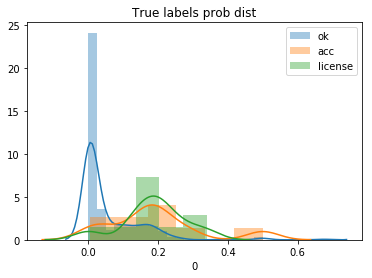

In [63]:
new_pred_mlogit = pd.concat([pred_mlogit, y_test_ord], axis=1)

ax = sns.distplot(new_pred_logit[new_pred_mlogit['det_pr'] == 0][0], label='ok')
ax = sns.distplot(new_pred_logit[new_pred_mlogit['det_pr'] == 1][0], label = 'acc')
ax = sns.distplot(new_pred_logit[new_pred_mlogit['det_pr'] == 2][0], label = 'license')
ax.legend()
ax.set_title('True labels prob dist');

In [64]:
new_pred_mlogit

,0,1,2,det_pr
686,8.998477e-01,6.160347e-02,3.854884e-02,0
543,8.838082e-01,7.085036e-02,4.534143e-02,0
539,9.614634e-01,3.294354e-02,5.593048e-03,0
832,9.946811e-01,1.191410e-03,4.127472e-03,0
589,9.439130e-01,4.079224e-02,1.529479e-02,0
531,9.455006e-01,3.249960e-02,2.199977e-02,0
202,9.990179e-01,8.561420e-04,1.260028e-04,0
369,9.997363e-01,1.036830e-04,1.599960e-04,0
164,9.999505e-01,2.612773e-05,2.333099e-05,0
401,9.999477e-01,3.539935e-05,1.693484e-05,0


In [73]:
df.loc[689]['name'] # 1 показатель
df.loc[491]['name'] # 5 показателей
df.loc[766]['name'] # 3 показателя 
df.loc[468]['name'] # кривые данные
df.loc[657]['name'] # консерватория
df.loc[576]['name'] # 1 показатель, странные данные


'Сочинский институт моды, бизнеса и права'